In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

### 【問題1】ジニ不純度を求める関数

In [2]:
def cal_gini_impurity(target_data):
    """
    Gini不純度を計算
    target : ndarray shape(1, sample)
    """
    tmp = 0
    count_all = len(target_data)
    label_list = np.unique(target_data)
    for i in range(len(label_list)):
        count = np.sum([target_data == label_list[i]])
        tmp += (count / count_all)**2
        
    return 1 - tmp

In [3]:
Data1 = np.concatenate((np.array([1 for _ in range(15)]), np.array([2 for _ in range(15)])), axis=0)
Data2 = np.concatenate((np.array([1 for _ in range(15)]), np.array([2 for _ in range(15)])), axis=0)
Data2 = np.concatenate((Data2, np.array([3 for _ in range(15)])), axis=0)
Data3 = np.concatenate((np.array([1 for _ in range(18)]), np.array([2 for _ in range(12)])), axis=0)
Data4 = np.concatenate((np.array([1 for _ in range(30)]), np.array([2 for _ in range(0)])), axis=0)

In [4]:
print("Data1=",cal_gini_impurity(Data1))
print("Data2=",cal_gini_impurity(Data2))
print("Data3=",cal_gini_impurity(Data3))
print("Data4=",cal_gini_impurity(Data4))

Data1= 0.5
Data2= 0.6666666666666667
Data3= 0.48
Data4= 0.0


### 【問題2】情報利得を求める関数
左ノードクラス1:サンプル数10, 左ノードクラス2:サンプル数30, 右ノードクラス1:サンプル数20, 右ノードクラス2:サンプル数5 → 情報利得0.143

In [5]:
def cal_info_gain(target_data_left, target_data_right):
    """
    情報利得を計算
  
    target_data_left : ndarray shape(1, sample(left))
    target_data_right : ndarray shape(1, sample(right))
    """
    #親データのジニ不純度計算のためright, leftのデータを合体
    target_data_left.reshape(1, len(target_data_left))
    target_data_right.reshape(1, len(target_data_right))
    target_data = np.concatenate((target_data_left, target_data_right), axis=0)
    #親、右、左のジニ不純度を計算
    count_parent = len(target_data_left) + len(target_data_right)
    gini_parent = cal_gini_impurity(target_data)
    coff_left = len(target_data_left) / count_parent
    coff_right = len(target_data_right) / count_parent
    tmp = cal_gini_impurity(target_data_left) * coff_left
    tmp += cal_gini_impurity(target_data_right) * coff_right
        
    return gini_parent - tmp

In [6]:
Data1_left = np.concatenate((np.array([1 for _ in range(10)]), np.array([2 for _ in range(30)])), axis=0)
Data1_right = np.concatenate((np.array([1 for _ in range(20)]), np.array([2 for _ in range(5)])), axis=0)

Data2_left = np.concatenate((np.array([1 for _ in range(30)]), np.array([2 for _ in range(0)])), axis=0)
Data2_right = np.concatenate((np.array([1 for _ in range(0)]), np.array([2 for _ in range(30)])), axis=0)

In [7]:
print("Data1=",cal_info_gain(Data1_left, Data1_right))
print("Data2=",cal_info_gain(Data2_left, Data2_right))

Data1= 0.14319526627218937
Data2= 0.5


##### データ準備

In [8]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
Y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.25, random_state=42)

In [10]:
import utils.ScratchDecisionTree as cScratchDT

In [11]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

def pipeline(model, X, y, X_val, y_val, normalization=True):
    """
    Parameter
    ---------------
    model : 利用するライブラリのオブジェクト
    target_value :目的変数名
    feature_value :　説明変数名
    normalization :フラグ True=正規分布で規格化　False=規格化しない
    
    Return
    ---------------
    fpr, tpr, thresholds
    """
     
    #学習データの特徴量を標準化
    if normalization == True:
        scaler = StandardScaler()
        scaler.fit(X)
        X = scaler.transform(X)
        scaler.fit(X_val)
        X_val = scaler.transform(X_val)

    #学習と予測    
    model.fit(X, y)
    result = model.predict(X_val)
    
    return result

### 【問題3】深さ1の決定木分類器クラスの作成

In [12]:
clf = cScratchDT.ScratchDecisionTreeClassifier(1)

In [13]:
pipeline(clf, train_x, train_y, test_x, test_y, normalization=False)

/Users/Nonna/DIC_copy/diveintocode-ml/sprint6/utils/ScratchDecisionTree.py:189: RuntimeWarning: invalid value encountered in long_scalars
  tmp += (count / count_all) ** 2


array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [14]:
print(test_y)

[0 0 0 1 0 0 1 1 1 0]


### 【問題4】（アドバンス課題）深さ2の決定木分類器クラスの作成

In [15]:
#深さ２の決定木
clf = cScratchDT.ScratchDecisionTreeClassifier(2)

In [16]:
pipeline(clf, train_x, train_y, test_x, test_y, normalization=True)

/Users/Nonna/DIC_copy/diveintocode-ml/sprint6/utils/ScratchDecisionTree.py:189: RuntimeWarning: invalid value encountered in long_scalars
  tmp += (count / count_all) ** 2


array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [17]:
print(test_y)

[0 0 0 1 0 0 1 1 1 0]


### 【問題5】（アドバンス課題）任意の深さに対応できる決定木分類器クラスの作成

In [18]:
#任意の深さの決定木 
clf = cScratchDT.ScratchDecisionTreeClassifier(4)

In [19]:
pipeline(clf, train_x, train_y, test_x, test_y, normalization=True)

/Users/Nonna/DIC_copy/diveintocode-ml/sprint6/utils/ScratchDecisionTree.py:189: RuntimeWarning: invalid value encountered in long_scalars
  tmp += (count / count_all) ** 2


array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [20]:
print(test_y)

[0 0 0 1 0 0 1 1 1 0]


### 【問題6】指標値の算出

In [21]:
result = pipeline(clf, train_x, train_y, test_x, test_y, normalization=True)

/Users/Nonna/DIC_copy/diveintocode-ml/sprint6/utils/ScratchDecisionTree.py:189: RuntimeWarning: invalid value encountered in long_scalars
  tmp += (count / count_all) ** 2


In [22]:
clf.cal_accuracy(result, test_y)

0.6

### 【問題7】決定領域の可視化

In [23]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

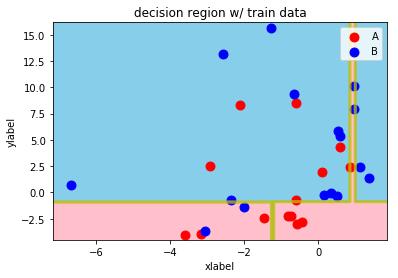

In [24]:
decision_region(train_x, 
                train_y, 
                clf,
                step=0.01, 
                title='decision region w/ train data', 
                xlabel='xlabel', 
                ylabel='ylabel', 
                target_names=['A', 'B'])

#### irisで試してみる

In [25]:
from sklearn.datasets import load_iris

In [26]:
iris_data_set = load_iris()
x = pd.DataFrame(iris_data_set.data, columns=iris_data_set.feature_names)    #Put explanatory variable into x as pandasdata frame
y = pd.DataFrame(iris_data_set.target, columns=['Species'])    #Put iris response variable into y as pandasdata frame
df = pd.concat([x, y], axis=1)

In [27]:
col_name = df.columns.values
data = df[[col_name[2], col_name[3], col_name[4]]]
data = data[data["Species"] != 0]
data.head()

,petal length (cm),petal width (cm),Species
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1


In [28]:
train_x, test_x, train_y, test_y = train_test_split(data[['petal length (cm)', 'petal width (cm)']].values, data['Species'].values, test_size=0.4, random_state=None)

In [29]:
#学習データの特徴量を標準化
scaler = StandardScaler()
scaler.fit(train_x)
train_feature = scaler.transform(train_x)

scaler.fit(test_x)
test_feature = scaler.transform(test_x)

In [30]:
clf = cScratchDT.ScratchDecisionTreeClassifier(4)

In [31]:
result = pipeline(clf, train_x, train_y, test_x, test_y, normalization=True)

/Users/Nonna/DIC_copy/diveintocode-ml/sprint6/utils/ScratchDecisionTree.py:189: RuntimeWarning: invalid value encountered in long_scalars
  tmp += (count / count_all) ** 2


In [32]:
print(test_y)
print(result)

[2 1 1 1 2 2 1 1 2 2 1 2 2 1 2 2 2 2 1 2 2 2 1 2 1 1 2 2 2 1 2 2 2 1 2 1 2
 1 1 2]
[2 1 1 1 2 1 1 1 2 2 1 2 2 1 2 2 1 1 1 2 2 2 1 2 1 1 2 2 2 1 2 2 2 1 2 1 1
 1 1 2]


In [33]:
clf.cal_accuracy(result, test_y)

0.9

結果、
そこそこ分類できた。

### 【問題8】決定木の利用場面

決定木とは、何らかの結果が記録されたデータセットを分類することでその結果に影響を与えた要因を分析し、その分類結果を利用して将来の予測を行うものなので、下記のニーズに答えることができる。

・自社商品・サービスの購入見込みが最も高い人は、どのような人であるかを知りたい
・満足度やロイヤリティの高い生活者には、どのような属性があるのかを知りたい
・商品が持つ要素のうち、生活者の満足度やロイヤリティに最も影響しているものを知りたい

これらを説明する要素を、強い相関のあるものから順に樹形図の形で表現できるため、統計に詳しくない相手にも直感的に理解して貰いやすいという利点もあるため、上層部やお客様などの説明の際にも使いやすいと考えられる。

※参考サイト　https://www.macromill.com/service/data_analysis/decision-tree.html
　　　　　　https://enterprisezine.jp/iti/detail/6323